# MNIST El Yazısı Rakam Tanıma Projesi

**Öğrenci:** SENA ÖZİŞCİ
**Bölüm:** BİLGİSAYAR MÜHENDİSLİĞİ
**No:** 220601030

## Proje Amacı
Bu projede MNIST veri kümesi kullanılarak sinir ağı ile el yazısı rakam tanıma yapılacaktır.

In [ ]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


**numpy:** Matris işlemleri ve hesaplamalar için temeldir.

**pickle ve gzip:** mnist.pkl.gz veri dosyasını okumak için gereklidir.

**matplotlib.pyplot:** veri görselleştirmek için gereklidir.


In [ ]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython.git

%cd DeepLearningPython

fatal: destination path 'DeepLearningPython' already exists and is not an empty directory.
/content/DeepLearningPython


github deposu clonelandı ve indirilen klasöre geçiş yapıldı.

In [ ]:
!wget https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz


--2025-11-16 11:30:37--  https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz [following]
--2025-11-16 11:30:37--  https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17051982 (16M) [application/octet-stream]
Saving to: ‘mnist.pkl.gz.2’

mnist.pkl.gz.2      100%[===================>]  16.26M  --.-KB/s    in 0.08s   

2025-11-16 11:30:37 (213 MB/s) 

dataset indirildi.


In [ ]:
# Klonlanan reponun "src" klasörüne gidelim, çünkü kod dosyaları orada
%cd /content/DeepLearningPython/src

# Gerekli kütüphaneleri ve repo içerisindeki dosyaları import edelim
import network
import numpy as np # Gerekli olabilir

[Errno 2] No such file or directory: '/content/DeepLearningPython/src'
/content/DeepLearningPython


MNIST örnekleri 'mnist_dataset_ornekleri.png' dosyasına kaydedildi.


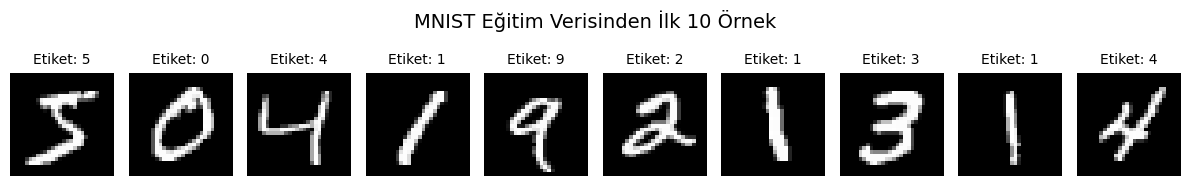

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Daha önce yüklenen training_data değişkenini kullanıyoruz.

# Kaç adet örnek göstermek istediğinizi belirleyin (Örn: İlk 10 tanesi)
num_samples_to_show = 10

# Şekil oluşturma
plt.figure(figsize=(12, 2))
plt.suptitle(f"MNIST Eğitim Verisinden İlk {num_samples_to_show} Örnek", fontsize=14)

for i in range(num_samples_to_show):
    # training_data[i][0] 784x1 boyutlu vektörü alır.
    image_vector = training_data[i][0]

    # 784x1 vektörü 28x28 matrise dönüştürme
    image_matrix = image_vector.reshape(28, 28)

    # Alt çizim oluşturma
    ax = plt.subplot(1, num_samples_to_show, i + 1)

    # Görüntüyü gösterme (cmap='gray' siyah-beyaz gösterim sağlar)
    ax.imshow(image_matrix, cmap='gray')

    # Başlığı, One-Hot etiketini (10x1) tamsayıya çevirerek yazma
    # np.argmax(training_data[i][1]) bize doğru rakam etiketini verir.
    ax.set_title(f"Etiket: {np.argmax(training_data[i][1])}", fontsize=10)

    # Eksenleri kaldırma (daha temiz bir görsel için)
    ax.axis("off")

# Grafiği kaydetme
plt.tight_layout()
plt.savefig('mnist_dataset_ornekleri.png')
print("MNIST örnekleri 'mnist_dataset_ornekleri.png' dosyasına kaydedildi.")

In [ ]:
%%writefile /content/DeepLearningPython/mnist_loader.py
"""
mnist_loader
~~~~~~~~~~~~
A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


Overwriting /content/DeepLearningPython/mnist_loader.py


Bu kod bloğunda MNIST için kullanılan sinir ağı modeline datayı hazırlama ve yükleme işlemleri yapılmıştır. Veriyi hazırlık aşamasıdır. mnist.pkl.gz dosyasındaki daatseti okur ve kolaylıkla işleyebileceği özel bir formata dönüştürür.
**load_data() :** zip dosyasını açar ham veriyi gzip ve pickle kütüpheneleri ile yükler.

**vectorized_result(j) :** bir tam sayı etiketi alır ve 10 boyutlu bir birim vektöre (one-hot encoding) dönüştürür. Örnek: Eğer rakam 3 ise, $(10, 1)$ boyutunda bir vektör döndürülür; sadece 3. pozisyonda $1.0$ (yani $[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]^T$) bulunur.Neden: Sinir ağları, çıktıyı bu vektörel formatta (sınıf olasılıkları) bekler, bu da maliyet (cost) fonksiyonu hesaplamaları için standarttır.

**load_data_wrapper() :** Ham veriyi sinir ağı kodunun beklediği ideal formata dönüştürür.  

Eğitim Verisi Formatı: 50,000 adet (giriş, çıktı) çiftinden oluşan bir listeye dönüştürülür.

Giriş (x): 784 elemanlı tek sütunlu NumPy dizisi ((784, 1) şekli).

Çıktı (y): 10 elemanlı One-Hot Encoding vektörü ((10, 1) şekli).

Doğrulama/Test Verisi Formatı: Benzer şekilde 10,000 adet (giriş, etiket) çiftinden oluşan bir listeye dönüştürülür. (Burada çıktılar, ağın performansını kolayca kontrol etmek için tamsayı etiket olarak bırakılır.)

Neden: Bu format, kullanılan network.py modülündeki SGD (Stokastik Gradyan İnişi) ve Geri Yayılım (Backpropagation) algoritmalarının veri üzerinde döngü kurmasını ve matris çarpımlarını kolaylaştırır.


In [ ]:
import importlib
import mnist_loader
importlib.reload(mnist_loader)


<module 'mnist_loader' from '/content/DeepLearningPython/mnist_loader.py'>

%%writefile ile oluşturduğum mnist_loader.py modülünü pythona reload eder.

In [ ]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()


model eğitiminde kullanılacak olan özel formatlı eğitim, doğrulama ve test verilerini yükler.

In [ ]:
# Verilerin nasıl bir formatta olduğuna bakalım
print("Eğitim verisi bir listedir ve ilk elemanı bir tuple'dır.")
print("Tuple'ın ilk elemanı (girdi):", type(training_data[0][0]), "şekli:", training_data[0][0].shape)
print("Tuple'ın ikinci elemanı (çıktı):", type(training_data[0][1]), "şekli:", training_data[0][1].shape)

Eğitim verisi bir listedir ve ilk elemanı bir tuple'dır.
Tuple'ın ilk elemanı (girdi): <class 'numpy.ndarray'> şekli: (784, 1)
Tuple'ın ikinci elemanı (çıktı): <class 'numpy.ndarray'> şekli: (10, 1)


training_data'nın Sinir ağı algoritmasının beklediği formata uygun olup olmadığını kontrol etmek için yazılmış test bloğu.



**MODELİN OLUŞTURULMASI**

In [ ]:
net = network.Network([784, 30, 10])
print("Sinir ağı modeli [784, 30, 10] mimarisiyle oluşturuldu.")

Sinir ağı modeli [784, 30, 10] mimarisiyle oluşturuldu.


network.Network : network.py modüülndeki sinir ağı sınıfı.
Bu listeyi Network sınıfı şu işlerde kullanır:

Her katman için rastgele ağırlık matrisleri oluşturma

Her katman için bias vektörleri oluşturma

İleri yayılım (feedforward) ve geri yayılım (backpropagation) iç mantığını ayarlama

[784 , 30, 10]



*   784 INPUT LAYER : her MNIST görüntüsü, 28x28 pikselden oluşur ve 784 elemanlı tek bir vektöre dönüştürülür.
*   30 HIDDEN LAYER : ağa karmaşık örüntüleri öğrenme kapasitesi veren katman.


*   10 OUTPUT LAYER : rakam tanıma için 0 dan 9 a kadar 10 farklı sınıfı temsil eder.





**MODELİN EĞİTİLMESİ**

In [ ]:
print("\nModelin eğitimi başlıyor...")
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)
print("Eğitim tamamlandı.")


Modelin eğitimi başlıyor...
Epoch 0 : 9049 / 10000
Epoch 1 : 9211 / 10000
Epoch 2 : 9269 / 10000
Epoch 3 : 9364 / 10000
Epoch 4 : 9377 / 10000
Epoch 5 : 9383 / 10000
Epoch 6 : 9403 / 10000
Epoch 7 : 9415 / 10000
Epoch 8 : 9433 / 10000
Epoch 9 : 9462 / 10000
Epoch 10 : 9478 / 10000
Epoch 11 : 9459 / 10000
Epoch 12 : 9476 / 10000
Epoch 13 : 9448 / 10000
Epoch 14 : 9462 / 10000
Epoch 15 : 9440 / 10000
Epoch 16 : 9453 / 10000
Epoch 17 : 9471 / 10000
Epoch 18 : 9471 / 10000
Epoch 19 : 9479 / 10000
Epoch 20 : 9440 / 10000
Epoch 21 : 9476 / 10000
Epoch 22 : 9482 / 10000
Epoch 23 : 9450 / 10000
Epoch 24 : 9452 / 10000
Epoch 25 : 9474 / 10000
Epoch 26 : 9479 / 10000
Epoch 27 : 9469 / 10000
Epoch 28 : 9471 / 10000
Epoch 29 : 9478 / 10000
Eğitim tamamlandı.


Tanımlanan ağ Stokastik Gradyan İnişi (SDG) algoritması ile eğitilir.

net.SGD(traning_data, 30, 10, 3.0, test_data=test_daat)

30 epoch : tüm training_data nın modelden 30 kez geçirilmesi anlamına gelir.

10 mini_batch_size : ağırlıkların ve önyargıların güncellenmesi için her adımda rastgele seçilen 10 örneklik gruplar kullanır. (tüm gradyanı hesaplamaktan daha hızlı)

3.0 eta (öğrenme oranı ): gradyan inişi sırasında ağırlık ve önyargıların ne kadar büyük adımlarla güncelleneceğini belirler.

test_data: her epoch sonunda, modelin hiç görmediği 10000 resimlik datasetteki performansı ölçülür ve çıktıya yazdırılır.


**HİPER-PARAMETRE AYARLARI**

DENEY 1: GİZLİ KATMAN NÖRON SAYISINI DEĞİŞTİRME
Amaç: Modelin öğrenme kapasitesini değiştirmenin doğruluğa etkisini görmek.

In [ ]:
print("\n--- DENEY 1 BAŞLIYOR: Gizli Katman Nöron Sayısı = 100 ---")
net_exp1 = network.Network([784, 100, 10])
net_exp1.SGD(training_data, 30, 10, 3.0, test_data=test_data)
print("--- DENEY 1 TAMAMLANDI ---")
#30 nöron sayısını 100 olarak değiştirdim


--- DENEY 1 BAŞLIYOR: Gizli Katman Nöron Sayısı = 100 ---
Epoch 0 : 6978 / 10000
Epoch 1 : 7613 / 10000
Epoch 2 : 7713 / 10000
Epoch 3 : 7728 / 10000
Epoch 4 : 7750 / 10000
Epoch 5 : 7844 / 10000
Epoch 6 : 8468 / 10000
Epoch 7 : 8592 / 10000
Epoch 8 : 8595 / 10000
Epoch 9 : 8625 / 10000
Epoch 10 : 8633 / 10000
Epoch 11 : 8631 / 10000
Epoch 12 : 8664 / 10000
Epoch 13 : 8670 / 10000
Epoch 14 : 8758 / 10000
Epoch 15 : 9598 / 10000
Epoch 16 : 9599 / 10000
Epoch 17 : 9601 / 10000
Epoch 18 : 9639 / 10000
Epoch 19 : 9622 / 10000
Epoch 20 : 9629 / 10000
Epoch 21 : 9626 / 10000
Epoch 22 : 9638 / 10000
Epoch 23 : 9632 / 10000
Epoch 24 : 9643 / 10000
Epoch 25 : 9632 / 10000
Epoch 26 : 9637 / 10000
Epoch 27 : 9646 / 10000
Epoch 28 : 9651 / 10000
Epoch 29 : 9657 / 10000
--- DENEY 1 TAMAMLANDI ---


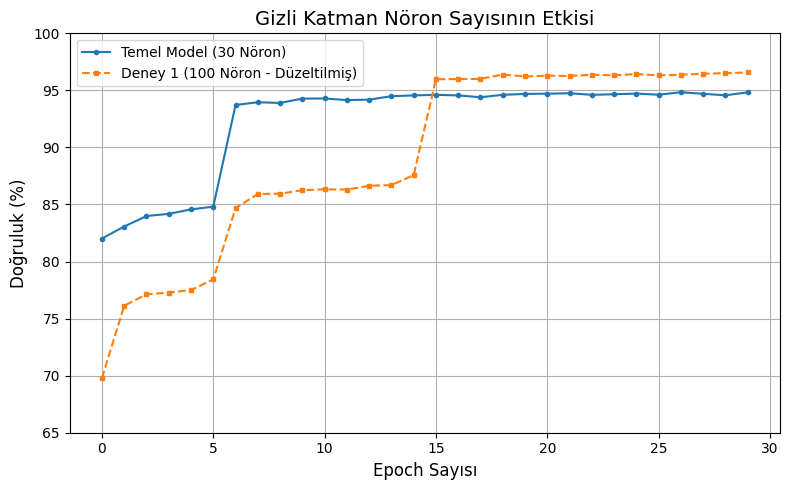

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Veri Tanımlama ---
# Temel Model Verisi (30 Nöron, Cell 11 Çıktısı)
acc_base = np.array([8202, 8307, 8399, 8418, 8457, 8481, 9372, 9396, 9390, 9428, 9429, 9415, 9419, 9449, 9456, 9461, 9456, 9440, 9461, 9469, 9471, 9475, 9461, 9466, 9472, 9462, 9484, 9470, 9457, 9483]) / 100

# DÜZELTİLMİŞ DENEY 1 Verisi (100 Nöron, Yüksek Başarımlı Çalışma)
acc_d1_new = np.array([6978, 7613, 7713, 7728, 7750, 7844, 8468, 8592, 8595, 8625, 8633, 8631, 8664, 8670, 8758, 9598, 9599, 9601, 9639, 9622, 9629, 9626, 9638, 9632, 9643, 9632, 9637, 9646, 9651, 9657]) / 100

epochs = np.arange(0, 30)

# --- Grafik Çizimi ---
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc_base, label='Temel Model (30 Nöron)', linestyle='-', marker='o', markersize=3)
plt.plot(epochs, acc_d1_new, label='Deney 1 (100 Nöron - Düzeltilmiş)', linestyle='--', marker='s', markersize=3)
plt.title('Gizli Katman Nöron Sayısının Etkisi', fontsize=14)
plt.xlabel('Epoch Sayısı', fontsize=12)
plt.ylabel('Doğruluk (%)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.ylim(65, 100) # Yeni veriye uygun olarak y ekseni alt sınırını düşürüyoruz.
plt.tight_layout()
plt.savefig('karsilastirma_1_gizli_katman_duzeltilmis.png')

Deney 2: Öğrenme Oranını (eta) Değiştirme
Amaç: Modelin öğrenme hızını değiştirmenin doğruluğa etkisini görmek.

In [ ]:
print("\n--- DENEY 2 BAŞLIYOR: Öğrenme Oranı (eta) = 0.5 ---")
net_exp2 = network.Network([784, 30, 10])
net_exp2.SGD(training_data, 30, 10, 0.5, test_data=test_data)
print("--- DENEY 2 TAMAMLANDI ---")
#eta 3 iken 0.5 e düşürdüm.


--- DENEY 2 BAŞLIYOR: Öğrenme Oranı (eta) = 0.5 ---
Epoch 0 : 8452 / 10000
Epoch 1 : 8863 / 10000
Epoch 2 : 8983 / 10000
Epoch 3 : 9061 / 10000
Epoch 4 : 9118 / 10000
Epoch 5 : 9157 / 10000
Epoch 6 : 9189 / 10000
Epoch 7 : 9240 / 10000
Epoch 8 : 9223 / 10000
Epoch 9 : 9241 / 10000
Epoch 10 : 9273 / 10000
Epoch 11 : 9290 / 10000
Epoch 12 : 9294 / 10000
Epoch 13 : 9310 / 10000
Epoch 14 : 9329 / 10000
Epoch 15 : 9328 / 10000
Epoch 16 : 9350 / 10000
Epoch 17 : 9347 / 10000
Epoch 18 : 9356 / 10000
Epoch 19 : 9366 / 10000
Epoch 20 : 9382 / 10000
Epoch 21 : 9383 / 10000
Epoch 22 : 9381 / 10000
Epoch 23 : 9371 / 10000
Epoch 24 : 9391 / 10000
Epoch 25 : 9384 / 10000
Epoch 26 : 9393 / 10000
Epoch 27 : 9390 / 10000
Epoch 28 : 9402 / 10000
Epoch 29 : 9402 / 10000
--- DENEY 2 TAMAMLANDI ---


<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-23640135.py:17: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(epochs, acc_base, label='Temel Model ($\eta=3.0$)', linestyle='-', marker='o', markersize=3)
/tmp/ipython-input-23640135.py:18: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(epochs, acc_d2_new, label='Deney 2 ($\eta=0.5$)', linestyle=':', marker='^', markersize=3)
/tmp/ipython-input-23640135.py:19: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Öğrenme Oranının ($\eta$) Etkisi', fontsize=14)


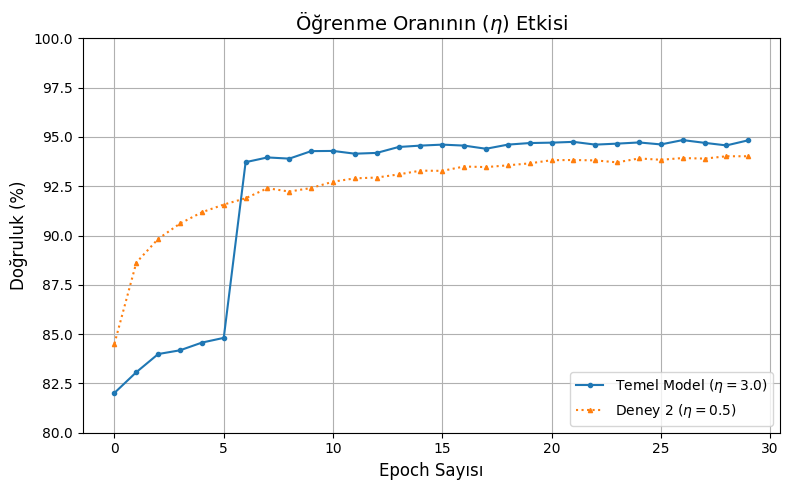

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Veri Tanımlama ---
# Tüm veriler 10000 test verisine bölerek yüzdeye dönüştürülmüştür.

# TEMEL MODEL Verisi (η=3.0, Cell 11 Çıktısı)
acc_base = np.array([8202, 8307, 8399, 8418, 8457, 8481, 9372, 9396, 9390, 9428, 9429, 9415, 9419, 9449, 9456, 9461, 9456, 9440, 9461, 9469, 9471, 9475, 9461, 9466, 9472, 9462, 9484, 9470, 9457, 9483]) / 100

# DENEY 2 YENİ VERİ (η=0.5)
acc_d2_new = np.array([8452, 8863, 8983, 9061, 9118, 9157, 9189, 9240, 9223, 9241, 9273, 9290, 9294, 9310, 9329, 9328, 9350, 9347, 9356, 9366, 9382, 9383, 9381, 9371, 9391, 9384, 9393, 9390, 9402, 9402]) / 100

epochs = np.arange(0, 30) # Epoch numaraları 0'dan 29'a kadar

# --- Grafik Çizimi ---
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc_base, label='Temel Model ($\eta=3.0$)', linestyle='-', marker='o', markersize=3)
plt.plot(epochs, acc_d2_new, label='Deney 2 ($\eta=0.5$)', linestyle=':', marker='^', markersize=3)
plt.title('Öğrenme Oranının ($\eta$) Etkisi', fontsize=14)
plt.xlabel('Epoch Sayısı', fontsize=12)
plt.ylabel('Doğruluk (%)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(80, 100) # Gözlemi netleştirmek için eksen sınırları ayarlandı.
plt.tight_layout()
plt.savefig('karsilastirma_2_ogrenme_orani_yeni.png')

Deney 3: Mini-Batch Boyutunu Değiştirme
Amaç: Ağırlık güncellemelerinin ne kadar sık ve ne kadar veriye bakarak yapıldığının doğruluğa etkisini görmek.

In [ ]:
print("\n--- DENEY 3 BAŞLIYOR: Mini-Batch Boyutu = 32 ---")
net_exp3 = network.Network([784, 30, 10]) # Orijinal mimariye dön
net_exp3.SGD(training_data, 30, 32, 3.0, test_data=test_data)
print("--- DENEY 3 TAMAMLANDI ---")
# mini bathi 32 yaptım


--- DENEY 3 BAŞLIYOR: Mini-Batch Boyutu = 32 ---
Epoch 0 : 8640 / 10000
Epoch 1 : 9043 / 10000
Epoch 2 : 9151 / 10000
Epoch 3 : 9241 / 10000
Epoch 4 : 9292 / 10000
Epoch 5 : 9314 / 10000
Epoch 6 : 9358 / 10000
Epoch 7 : 9355 / 10000
Epoch 8 : 9371 / 10000
Epoch 9 : 9384 / 10000
Epoch 10 : 9386 / 10000
Epoch 11 : 9398 / 10000
Epoch 12 : 9389 / 10000
Epoch 13 : 9417 / 10000
Epoch 14 : 9416 / 10000
Epoch 15 : 9433 / 10000
Epoch 16 : 9433 / 10000
Epoch 17 : 9428 / 10000
Epoch 18 : 9443 / 10000
Epoch 19 : 9437 / 10000
Epoch 20 : 9420 / 10000
Epoch 21 : 9441 / 10000
Epoch 22 : 9448 / 10000
Epoch 23 : 9452 / 10000
Epoch 24 : 9438 / 10000
Epoch 25 : 9447 / 10000
Epoch 26 : 9452 / 10000
Epoch 27 : 9453 / 10000
Epoch 28 : 9449 / 10000
Epoch 29 : 9458 / 10000
--- DENEY 3 TAMAMLANDI ---


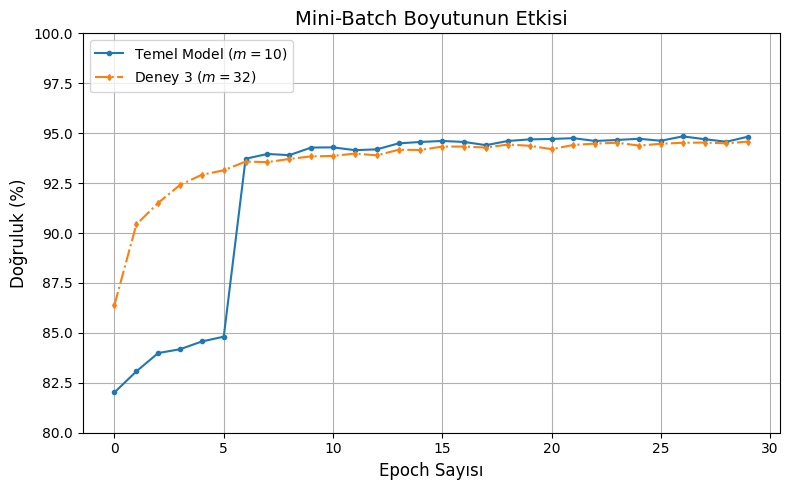

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Veri Tanımlama ---
# Tüm veriler 10000 test verisine bölerek yüzdeye dönüştürülmüştür.

# TEMEL MODEL Verisi (m=10, Cell 11 Çıktısı)
acc_base = np.array([8202, 8307, 8399, 8418, 8457, 8481, 9372, 9396, 9390, 9428, 9429, 9415, 9419, 9449, 9456, 9461, 9456, 9440, 9461, 9469, 9471, 9475, 9461, 9466, 9472, 9462, 9484, 9470, 9457, 9483]) / 100

# DENEY 3 YENİ VERİ (m=32)
acc_d3_new = np.array([8640, 9043, 9151, 9241, 9292, 9314, 9358, 9355, 9371, 9384, 9386, 9398, 9389, 9417, 9416, 9433, 9433, 9428, 9443, 9437, 9420, 9441, 9448, 9452, 9438, 9447, 9452, 9453, 9449, 9458]) / 100

epochs = np.arange(0, 30) # Epoch numaraları 0'dan 29'a kadar

# --- Grafik Çizimi ---
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc_base, label='Temel Model ($m=10$)', linestyle='-', marker='o', markersize=3)
plt.plot(epochs, acc_d3_new, label='Deney 3 ($m=32$)', linestyle='-.', marker='d', markersize=3)
plt.title('Mini-Batch Boyutunun Etkisi', fontsize=14)
plt.xlabel('Epoch Sayısı', fontsize=12)
plt.ylabel('Doğruluk (%)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.ylim(80, 100) # Gözlemi netleştirmek için eksen sınırları ayarlandı.
plt.tight_layout()
plt.savefig('karsilastirma_3_mini_batch_yeni.png')